## Cost of Living Analysis 
Beldina Kinya - 145197

## Imports and Data Loading

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [155]:
data = pd.read_csv("nairobi_cost_of_living.csv")
data.head()

,Date,Area,Rent,Food,Transport,Utilities,Misc,Total
0,2019-01-31,Westlands,90341,25454,15634,6142,13468,151039
1,2019-01-31,Westlands,93902,24808,17194,6803,13608,156315
2,2019-01-31,Kileleshwa,78160,23302,13104,6454,12959,133979
3,2019-01-31,Westlands,87721,29735,18420,7934,14908,158719
4,2019-01-31,Ngong,32881,13471,10989,3062,8450,68853


## Data Cleaning and Preprocessing

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       60000 non-null  object
 1   Area       60000 non-null  object
 2   Rent       60000 non-null  int64 
 3   Food       60000 non-null  int64 
 4   Transport  60000 non-null  int64 
 5   Utilities  60000 non-null  int64 
 6   Misc       60000 non-null  int64 
 7   Total      60000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.7+ MB


In [157]:
# Get summary statistics
data.describe()

,Rent,Food,Transport,Utilities,Misc,Total
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,43162.665250,15634.391467,8345.715850,4315.691933,7682.336200,79140.814600
std,35029.362864,5392.620131,3482.492604,1517.127833,3660.365176,47377.806092
min,7045.000000,6034.000000,2556.000000,1526.000000,1040.000000,20482.000000
25%,22246.000000,11661.000000,5805.750000,3201.000000,5050.000000,48928.000000
50%,29825.500000,14450.000000,7522.000000,4135.000000,7053.000000,61107.000000
75%,47168.000000,18691.000000,10195.250000,5058.000000,9375.000000,90034.000000
max,177159.000000,36934.000000,26357.000000,9698.000000,20418.000000,259008.000000


In [158]:
data.dtypes

Date         object
Area         object
Rent          int64
Food          int64
Transport     int64
Utilities     int64
Misc          int64
Total         int64
dtype: object

In [159]:
#Created a copy of the original dataframe
df = data.copy()
# Convert Date column to date time format
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Area,Rent,Food,Transport,Utilities,Misc,Total
0,2019-01-31,Westlands,90341,25454,15634,6142,13468,151039
1,2019-01-31,Westlands,93902,24808,17194,6803,13608,156315
2,2019-01-31,Kileleshwa,78160,23302,13104,6454,12959,133979
3,2019-01-31,Westlands,87721,29735,18420,7934,14908,158719
4,2019-01-31,Ngong,32881,13471,10989,3062,8450,68853


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       60000 non-null  datetime64[ns]
 1   Area       60000 non-null  object        
 2   Rent       60000 non-null  int64         
 3   Food       60000 non-null  int64         
 4   Transport  60000 non-null  int64         
 5   Utilities  60000 non-null  int64         
 6   Misc       60000 non-null  int64         
 7   Total      60000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 3.7+ MB


## Research Questions

1. Cost of Living Trends Over Time
- How has the total cost of living in Nairobi changed over time?
- Are there any seasonal patterns in cost fluctuations

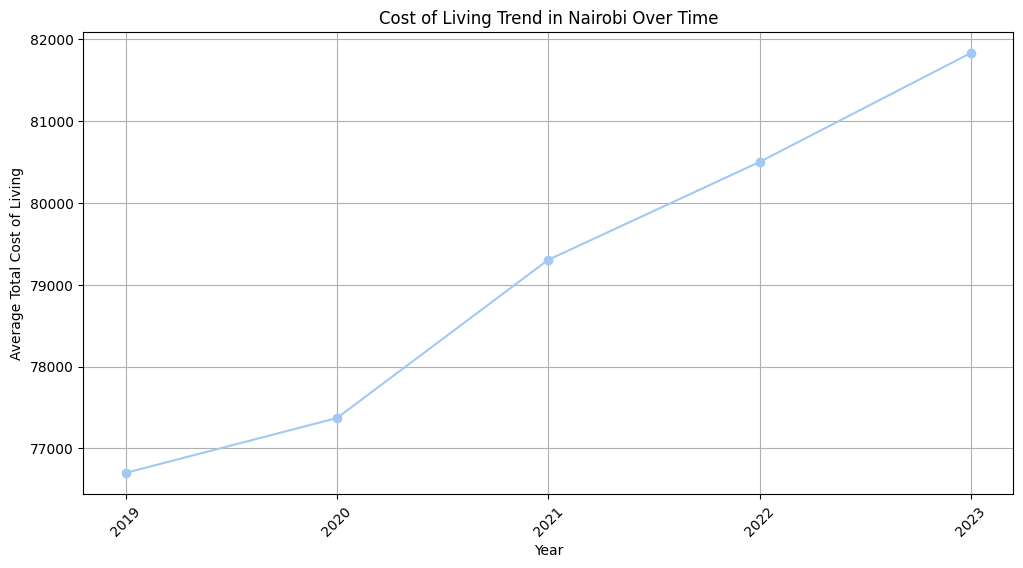

In [161]:
# Analyze cost of living trends over time

# Convert Date column to Year
df['Year'] = pd.to_datetime(df['Date']).dt.year  
yearly_cost = df.groupby('Year')['Total'].mean()
yearly_cost.index = yearly_cost.index.astype(int)

# Plot cost of living trend over time
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
plt.plot(yearly_cost.index, yearly_cost, marker='o', linestyle='-')
plt.xticks(yearly_cost.index.astype(int), rotation=45)  # Ensure full year labels
plt.xlabel("Year")
plt.ylabel("Average Total Cost of Living")
plt.title("Cost of Living Trend in Nairobi Over Time")
plt.grid(True)
plt.show()

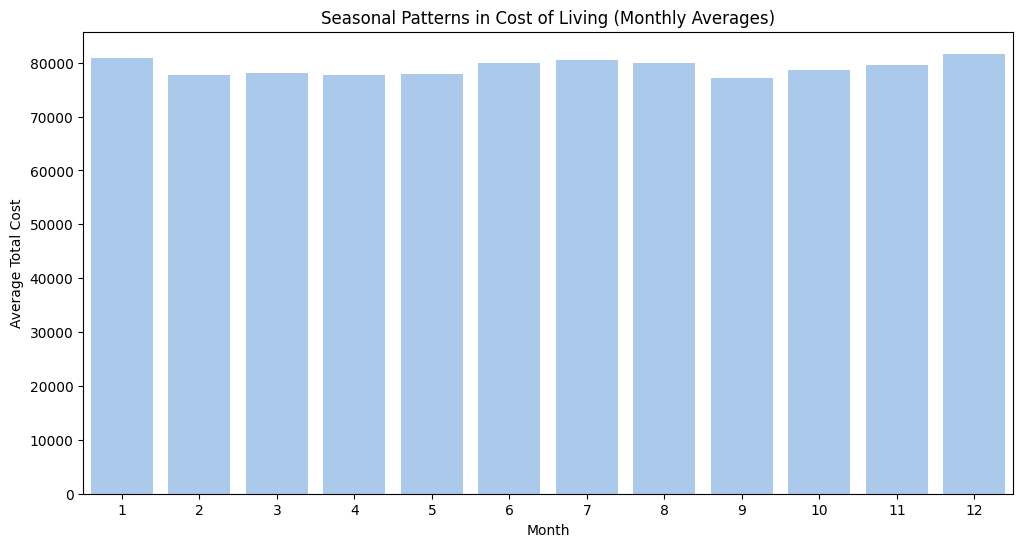

In [162]:
# Seasonality Analysis
# Checking average cost per month over multiple years
df['Month'] = df['Date'].dt.month
seasonal_cost = df.groupby('Month')['Total'].mean()

# Plot Seasonality Trend
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.barplot(x=seasonal_cost.index, y=seasonal_cost.values)
plt.xlabel("Month")
plt.ylabel("Average Total Cost")
plt.title("Seasonal Patterns in Cost of Living (Monthly Averages)")
plt.show()

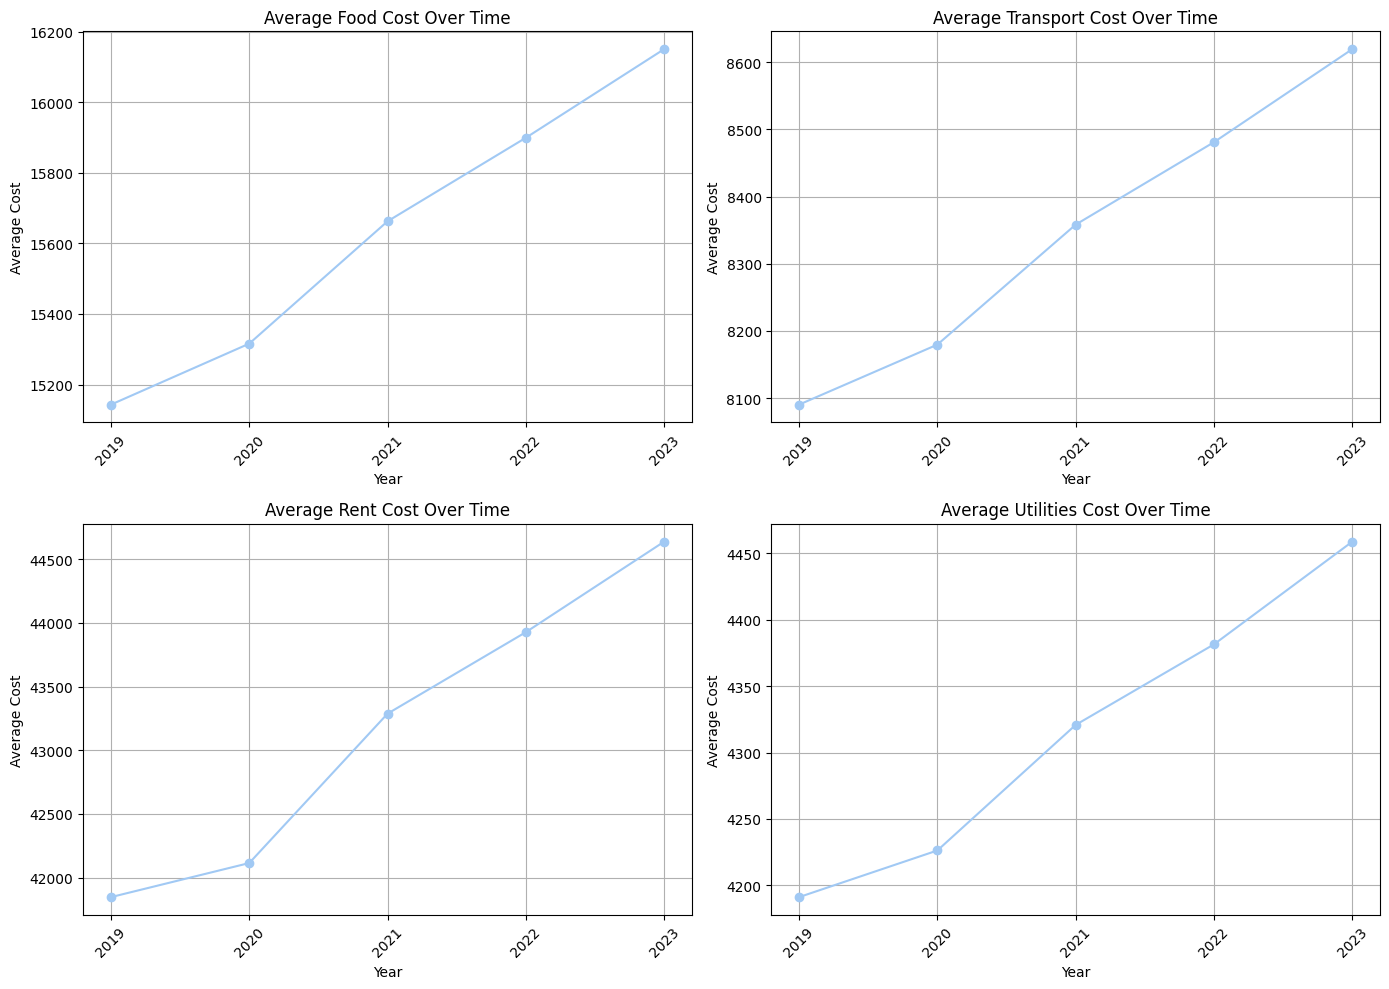

In [163]:
# Aggregate the average cost by year for each category
yearly_food = df.groupby('Year')['Food'].mean()
yearly_transport = df.groupby('Year')['Transport'].mean()
yearly_rent = df.groupby('Year')['Rent'].mean()
yearly_utilities = df.groupby('Year')['Utilities'].mean()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Food trend
axs[0, 0].plot(yearly_food.index.astype(int), yearly_food, marker='o', linestyle='-')
axs[0, 0].set_xticks(yearly_food.index.astype(int))
axs[0, 0].set_xticklabels(yearly_food.index.astype(int), rotation=45)
axs[0, 0].set_title('Average Food Cost Over Time')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Cost')
axs[0, 0].grid(True)

# Plot Transport trend
axs[0, 1].plot(yearly_transport.index.astype(int), yearly_transport, marker='o', linestyle='-')
axs[0, 1].set_xticks(yearly_transport.index.astype(int))
axs[0, 1].set_xticklabels(yearly_transport.index.astype(int), rotation=45)
axs[0, 1].set_title('Average Transport Cost Over Time')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Average Cost')
axs[0, 1].grid(True)

# Plot Rent trend
axs[1, 0].plot(yearly_rent.index.astype(int), yearly_rent, marker='o', linestyle='-')
axs[1, 0].set_xticks(yearly_rent.index.astype(int))
axs[1, 0].set_xticklabels(yearly_rent.index.astype(int), rotation=45)
axs[1, 0].set_title('Average Rent Cost Over Time')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Cost')
axs[1, 0].grid(True)

# Plot Misc trend
axs[1, 1].plot(yearly_utilities.index.astype(int), yearly_utilities, marker='o', linestyle='-')
axs[1, 1].set_xticks(yearly_utilities.index.astype(int))
axs[1, 1].set_xticklabels(yearly_utilities.index.astype(int), rotation=45)
axs[1, 1].set_title('Average Utilities Cost Over Time')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Cost')
axs[1, 1].grid(True)

sns.set_palette("pastel")
plt.tight_layout()
plt.show()


2. Relationship Between Different Cost Components
- Which factor contributes the most to the overall cost of living?
- Is there a strong relationship between rent and transport costs (e.g., are cheaper rent areas associated with higher transport costs)?
- Are there specific areas where food or transport costs significantly differ from others?

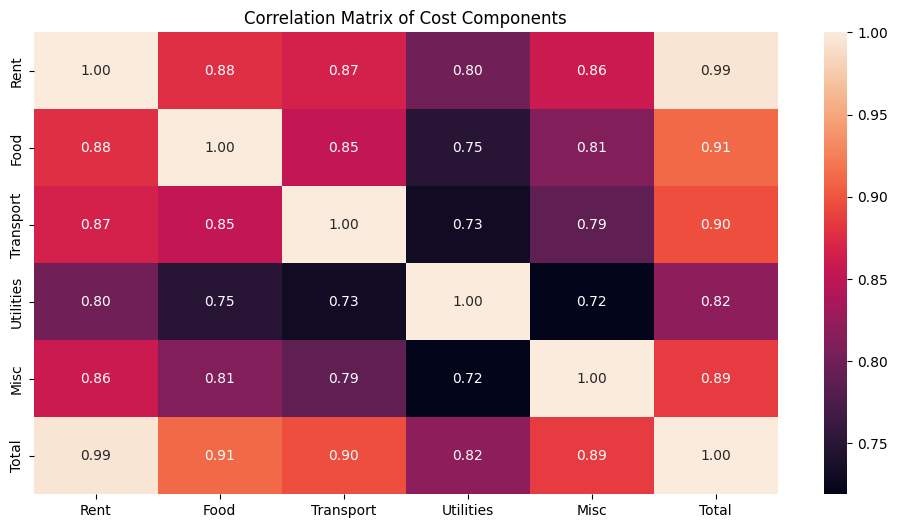

In [164]:
# Correlation matrix to see the relationship between different cost components
correlation_matrix = df[['Rent', 'Food', 'Transport', 'Utilities', 'Misc', 'Total']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Correlation Matrix of Cost Components")
plt.show()

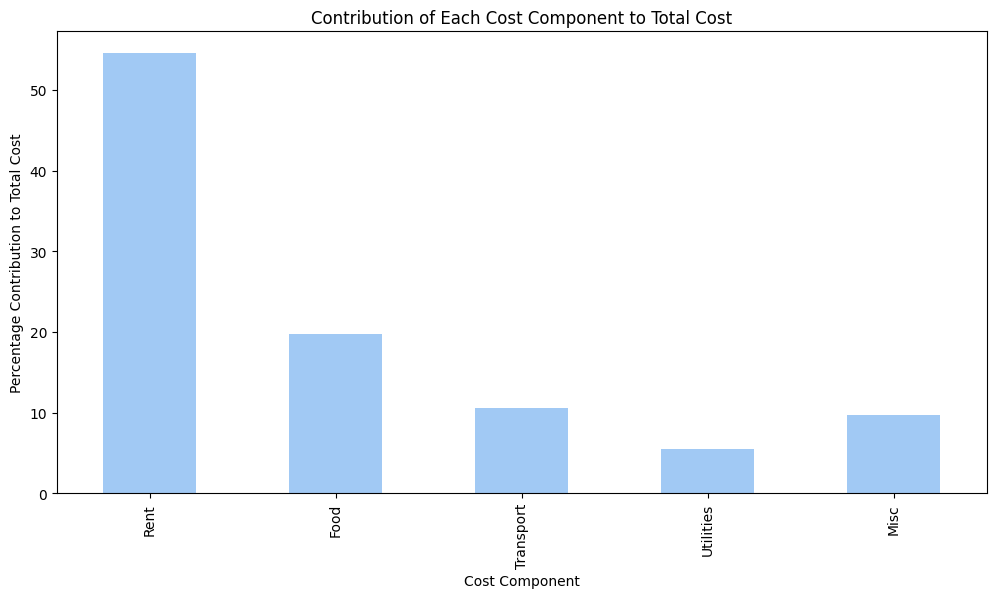

In [165]:
# Contribution of each component to the total cost
component_contribution = df[['Rent', 'Food', 'Transport', 'Utilities', 'Misc']].mean() / df['Total'].mean() * 100

# Plot the contribution of each component
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
component_contribution.plot(kind='bar')
plt.xlabel("Cost Component")
plt.ylabel("Percentage Contribution to Total Cost")
plt.title("Contribution of Each Cost Component to Total Cost")
plt.show()

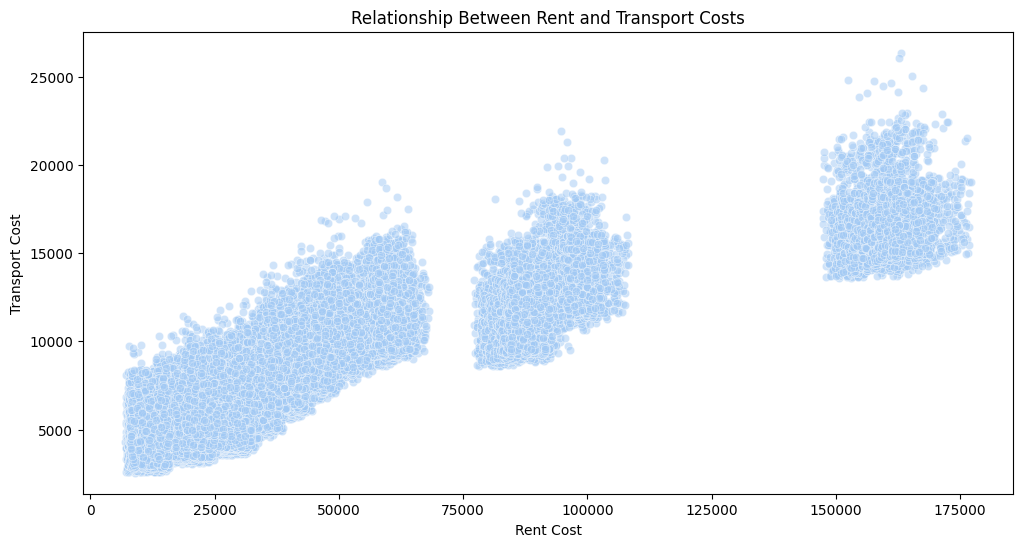

In [166]:
# Scatter plot to check the relationship between Rent and Transport costs
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.scatterplot(x='Rent', y='Transport', data=df, alpha=0.5)
plt.xlabel("Rent Cost")
plt.ylabel("Transport Cost")
plt.title("Relationship Between Rent and Transport Costs")
plt.show()

3. Area Classification Based on Cost
- Goal: Categorize Nairobi’s areas into "Affordable," "Mid-range," and "Expensive."

In [167]:

# Prepare the data for classification
X = df[['Rent', 'Food', 'Transport', 'Utilities', 'Misc']]
y = pd.qcut(df['Total'], q=3, labels=['Affordable', 'Mid-range', 'Expensive'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict the classifications
y_pred = knn.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Add the classification results to the dataframe
df['Classification'] = knn.predict(scaler.transform(X))

              precision    recall  f1-score   support

  Affordable       0.95      0.95      0.95      6011
   Expensive       0.98      0.97      0.98      6021
   Mid-range       0.93      0.93      0.93      5968

    accuracy                           0.95     18000
   macro avg       0.95      0.95      0.95     18000
weighted avg       0.95      0.95      0.95     18000



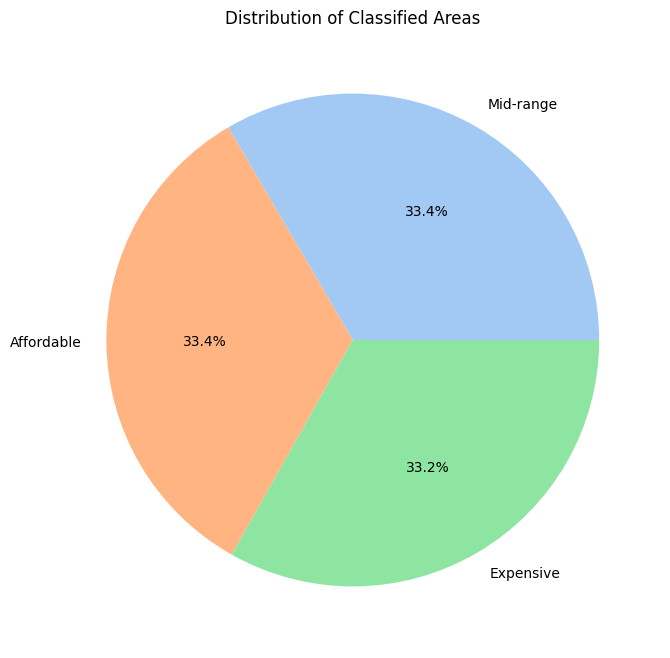

In [168]:
# Count the occurrences of each classification category
classification_counts = df['Classification'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
classification_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Classified Areas")
plt.ylabel("") 
plt.show()

4. Cost of Living Forecasting
Goal: Predict the total cost of living in the future based on historical trends.

Predicted Total Cost of Living: KES 60277.84


<Figure size 1200x600 with 0 Axes>

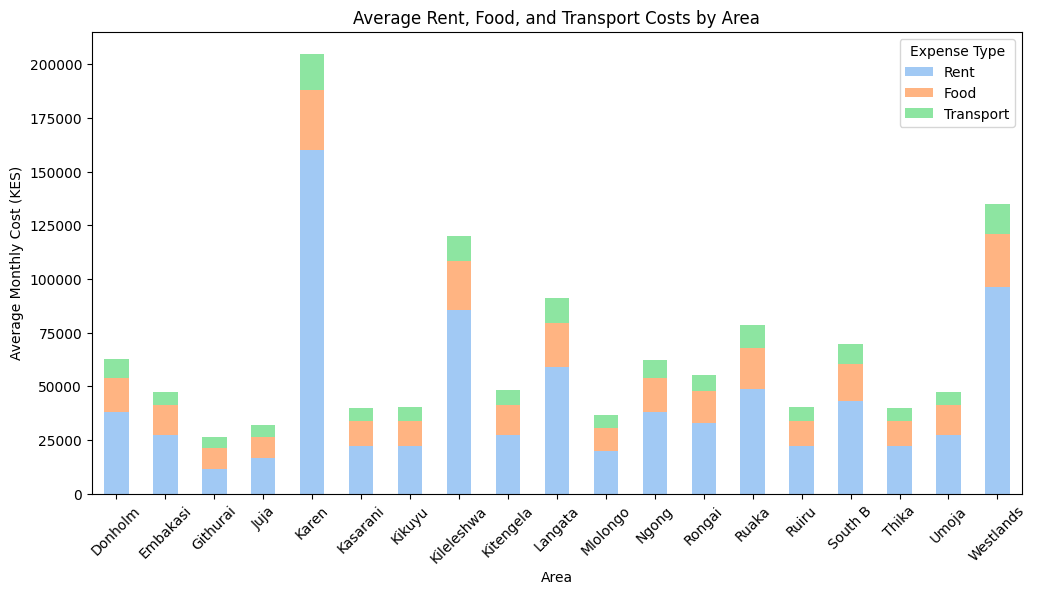

In [169]:
# Prepare data for prediction
X = df[['Rent', 'Food', 'Transport']]
y = df['Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict cost of living
def predict_cost_of_living(rent, food, transport):
    input_data = pd.DataFrame([[rent, food, transport]], columns=['Rent', 'Food', 'Transport'])
    predicted_total = model.predict(input_data)[0]
    return predicted_total

# Example use case
rent = 30000 
food = 15000  
transport = 5000  
predicted_cost = predict_cost_of_living(rent, food, transport)
print(f"Predicted Total Cost of Living: KES {predicted_cost:.2f}")

# Plot percentage distribution of expenses by area
area_avg = df.groupby('Area').mean(numeric_only=True)[['Rent', 'Food', 'Transport', 'Total']]
plt.figure(figsize=(12, 6))
area_avg[['Rent', 'Food', 'Transport']].plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel("Average Monthly Cost (KES)")
plt.title("Average Rent, Food, and Transport Costs by Area")
plt.legend(title="Expense Type")
plt.xticks(rotation=45)
plt.show()

## Regression Analysis - Predicting the cost of Living

Regression Model - y = β⁰ + β1X1 + β2X2 + β3X3 + β4X4 + E

- y - Independent Variable (Total Cost)
- X1 - Rent
- X2 - Food
- X3 - Transport
- x4 - Utilities
- β⁰ - Constant of Variable
- β1 - β2 - Regression Co-efficients
- E - Error of Estimate


In [170]:
# Prepare data for regression analysis
X = df[['Rent', 'Food', 'Transport', 'Utilities']]
X = sm.add_constant(X)  # Add constant term for regression
y = df['Total']

# Perform Multiple Linear Regression
model = sm.OLS(y, X).fit()
print("\nMultiple Linear Regression Results: Predicting Cost of Living")
print(model.summary())


Multiple Linear Regression Results: Predicting Cost of Living
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.027e+07
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:56:24   Log-Likelihood:            -5.3518e+05
No. Observations:               60000   AIC:                         1.070e+06
Df Residuals:                   59995   BIC:                         1.070e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Adjusted R-Square ##
- 99.9% of the changes in the total cost of living can be attributed to changes in rent, food, transport and utilities. 
## Goodness of Fit ## 
- F-statistic ( 1.027e+07) and Prob (F-statistic) (0.00): The very low p-value (0.00) indicates that the model is statistically significant, meaning that at least one of the independent variables is likely to have a significant impact on the total cost of living.
## Regression Equation
 y = 1636.41 + 1.0581X1 + 1.1401X2 + 1.0994X3 + 1.1202X4 + E
- Const(1636.41) - this shows the total cost of living if all other variables are zero. 
- Rent(1.0581) - This shows a Positive correlation, meaning the cost of living increase the more rent prices increase. The cost increase by 1.0581 the more the rent costs increases. The low p-value indicates that this effect is statistically significant.
- Food(1.1401) - This shows a Positive correlation, meaning the cost of living increase the more Food prices increase. The cost increase by 1.1401 the more the food costs increases. The low p-value indicates that this effect is statistically significant.
- Transport(1.0994) - There is a positive correlation between the cost of living and transport prices.The Cost of living per unit increase by 1.0994 the further the distance is. The low p-value suggests that this effect is also statistically significant.
- Utilities(1.1202) - There is a positive correlation between the cost of living and utilities prices.The Cost of living per unit increase by 1.1202 when the utilities cost increase. The low p-value suggests that this effect is also statistically significant.

5. Budgeting Insights
- How much does an average Nairobi resident need to earn to afford living in different areas?
- What percentage of income is typically spent on rent, food, and transport in different areas?

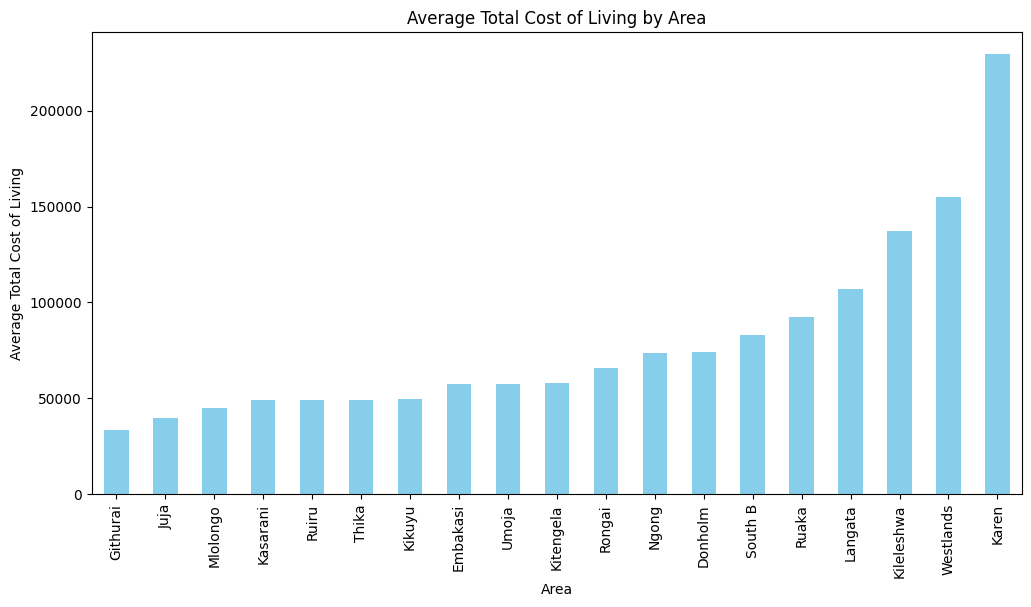

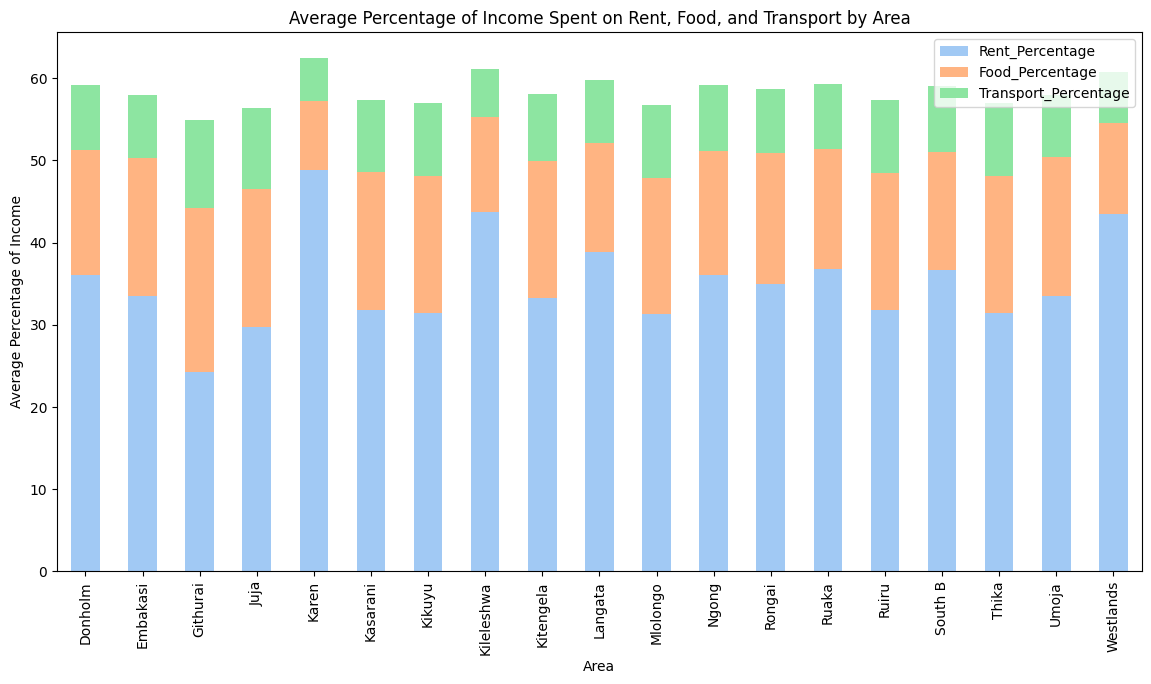

In [171]:
# Calculate the average total cost of living in different areas
average_cost_by_area = df.groupby('Area')['Total'].mean().sort_values()

# Calculate the percentage of income spent on rent, food, and transport
df['Income'] = df['Total'] / 0.7  # Assuming 70% of income is spent on living costs
df['Rent_Percentage'] = (df['Rent'] / df['Income']) * 100
df['Food_Percentage'] = (df['Food'] / df['Income']) * 100
df['Transport_Percentage'] = (df['Transport'] / df['Income']) * 100

# Calculate the average percentage spent on rent, food, and transport in different areas
average_percentage_by_area = df.groupby('Area')[['Rent_Percentage', 'Food_Percentage', 'Transport_Percentage']].mean()


# Plot the average total cost of living by area
plt.figure(figsize=(12, 6))
average_cost_by_area.plot(kind='bar', color='skyblue')
plt.xlabel("Area")
plt.ylabel("Average Total Cost of Living")
plt.title("Average Total Cost of Living by Area")
plt.xticks(rotation=90)
plt.show()

# Plot the average percentage of income spent on rent, food, and transport by area
average_percentage_by_area.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.xlabel("Area")
plt.ylabel("Average Percentage of Income")
plt.title("Average Percentage of Income Spent on Rent, Food, and Transport by Area")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [172]:
average_percentage_by_area

,Rent_Percentage,Food_Percentage,Transport_Percentage
Area,,,
Donholm,36.037365,15.184945,7.953947
Embakasi,33.469186,16.881377,7.580487
Githurai,24.278969,19.966403,10.686613
Juja,29.675541,16.820605,9.906419
Karen,48.803762,8.493610,5.190962
Kasarani,31.794983,16.788379,8.789830
Kikuyu,31.482979,16.651208,8.850481
Kileleshwa,43.780025,11.474695,5.935094
Kitengela,33.215141,16.771130,8.107488


In [173]:
# The minimum one needs to live in Nairobi in the future
min_forecasted_value = forecast.min()
print(f"The minimum forecasted total cost of living in Nairobi in the future is: KES {min_forecasted_value:.2f}")

The minimum forecasted total cost of living in Nairobi in the future is: KES 84072.30
